# Magics

In [1]:
%load_ext autoreload

%autoreload 2

# Imports

In [2]:
import os
import configparser
import pathlib as p
import numpy as np

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt 

In [4]:
import pandas as pd
pd.options.display.max_columns = 999

In [5]:
import tensorflow as tf

In [6]:
tf.enable_eager_execution()

In [7]:
from frag_nn.network_tf import GNINA
from frag_nn.dataset_tf import XChemDataset
# import frag_nn.transforms_tf as trans_tf
import frag_nn.data_loader_tf as dl_tf
import frag_nn.constants as c


# Get Config

In [8]:
# config_path = "/dls/science/groups/i04-1/conor_dev/pandda_nn/frag_nn/params.ini"
config_path = "/dls/science/groups/i04-1/conor_dev/pandda_nn/frag_nn/params.ini"

In [9]:
conf = configparser.ConfigParser()

In [10]:
conf.read(config_path)

['/dls/science/groups/i04-1/conor_dev/pandda_nn/frag_nn/params.ini']

In [11]:
ds_conf = conf[c.x_chem_database]

# Load Database

In [12]:
x_chem_dataset = XChemDataset(host=ds_conf[c.db_host], 
                         port=ds_conf[c.db_port], 
                         database=ds_conf[c.db_database], 
                         user=ds_conf[c.db_user], 
                         password=ds_conf[c.db_password])


In [13]:
x_chem_dataset.get_database("pandda_event")

,id,event,event_centroid_x,event_centroid_y,event_centroid_z,event_dist_from_site_centroid,lig_centroid_x,lig_centroid_y,lig_centroid_z,lig_dist_event,lig_id,pandda_event_map_native,pandda_model_pdb,pandda_input_mtz,pandda_input_pdb,crystal_id,pandda_run_id,site_id,pandda_event_map_cut,ligand_confidence_inspect,ligand_confidence,ligand_confidence_source,comment,data_proc_id,refinement_id,interesting,event_status,created_date,modified_date
0,89808,1,-25.714760,-18.774393,74.669490,115.938375513,-26.127133,-19.161533,75.524867,0.426227,LIG E 1,/dls/labxchem/data/2018/lb19990-1/processing/a...,/dls/labxchem/data/2018/lb19990-1/processing/a...,/dls/labxchem/data/2018/lb19990-1/processing/a...,/dls/labxchem/data/2018/lb19990-1/processing/a...,724023,848,208499,None,High,4 - High Confidence,SD,no comment,685679,700791,False,4,2019-03-04 13:19:01.925640+00:00,2019-03-05 14:27:06.165243+00:00
1,89817,1,-10.306649,-45.824505,56.227310,104.347246519,11.036231,-37.789615,57.381923,3.301904,LIG E 1,/dls/labxchem/data/2018/lb19990-1/processing/a...,/dls/labxchem/data/2018/lb19990-1/processing/a...,/dls/labxchem/data/2018/lb19990-1/processing/a...,/dls/labxchem/data/2018/lb19990-1/processing/a...,724109,848,208501,None,Low,Low,SD,no comment,685765,700877,False,4,2019-03-04 13:19:01.925640+00:00,2019-03-05 14:27:06.169057+00:00
2,207127,1,-13.879547,62.677314,-6.326851,94.0954532855,-9.860706,62.280176,-6.204706,3.676048,LIG I 1,/dls/labxchem/data/2017/lb18278-1/processing/a...,/dls/labxchem/data/2017/lb18278-1/processing/a...,/dls/labxchem/data/2017/lb18278-1/processing/a...,/dls/labxchem/data/2017/lb18278-1/processing/a...,1008443,404,6542,None,None,None,NA,no comment,965373,980485,False,2,2019-03-04 13:19:01.925640+00:00,2019-03-05 14:27:06.172643+00:00
3,207128,3,-17.150569,67.832628,-3.884118,97.9965899397,-50.036941,48.300824,-10.867647,1.327449,LIG I 2,/dls/labxchem/data/2017/lb18278-1/processing/a...,/dls/labxchem/data/2017/lb18278-1/processing/a...,/dls/labxchem/data/2017/lb18278-1/processing/a...,/dls/labxchem/data/2017/lb18278-1/processing/a...,1008484,404,6542,None,None,None,NA,no comment,965414,980526,False,2,2019-03-04 13:19:01.925640+00:00,2019-03-05 14:27:06.175329+00:00
4,207129,1,-18.834788,66.866477,-13.160804,98.4475469829,-16.227529,65.327941,-13.677706,0.128484,LIG I 3,/dls/labxchem/data/2017/lb18278-1/processing/a...,/dls/labxchem/data/2017/lb18278-1/processing/a...,/dls/labxchem/data/2017/lb18278-1/processing/a...,/dls/labxchem/data/2017/lb18278-1/processing/a...,1008825,404,6542,None,None,None,NA,no comment,965755,980867,False,2,2019-03-04 13:19:01.925640+00:00,2019-03-05 14:27:06.178080+00:00
5,174128,3,11.512784,13.339129,14.711447,36.9053117894,11.926500,15.062125,16.442688,2.753091,LIG D 2,/dls/labxchem/data/2018/lb19400-1/processing/a...,/dls/labxchem/data/2018/lb19400-1/processing/a...,/dls/labxchem/data/2018/lb19400-1/processing/a...,/dls/labxchem/data/2018/lb19400-1/processing/a...,889075,912,290029,None,Low,Low,SD,no comment,849098,864210,False,5,2019-03-04 13:19:01.925640+00:00,2019-03-05 14:27:06.191238+00:00
6,207126,1,-7.214308,67.729323,-3.370415,96.6618066388,-10.309833,65.496556,-3.853222,1.469339,LIG I 1,/dls/labxchem/data/2017/lb18278-1/processing/a...,/dls/labxchem/data/2017/lb18278-1/processing/a...,/dls/labxchem/data/2017/lb18278-1/processing/a...,/dls/labxchem/data/2017/lb18278-1/processing/a...,1008834,404,6542,None,None,None,NA,no comment,965764,980876,False,3,2019-03-04 13:19:01.925640+00:00,2019-03-05 14:27:06.195922+00:00
7,88668,1,-4.089268,-24.952103,27.085863,54.8430717837,-5.072333,-26.251600,26.630467,1.956114,LIG E 1,/dls/labxchem/data/2018/lb19990-1/processing/a...,/dls/labxchem/data/2018/lb19990-1/processing/a...,/dls/labxchem/data/2018/lb19990-1/processing/a...,/dls/labxchem/data/2018/lb19990-1/processing/a...,723859,357,5915,None,High,1 - Low Confidence,SD,no comment,685515,700627,False,1,2019-03-04 13:19:01.925640+00:00,2019-03-05 14:27:06.201871+00:00
8,88658,2,14.962372,-32.484

In [14]:
events = x_chem_dataset.get_database("pandda_event")

# Load records from database

In [15]:
records = x_chem_dataset.get_event_data_paths()


[Errno 13] Permission denied: '/dls/labxchem/data/2018/lb19990-1/processing/analysis/initial_model/SERC-x0272/SERC-x0272-pandda-input.pdb'
[Errno 13] Permission denied: '/dls/labxchem/data/2018/lb19990-1/processing/analysis/initial_model/SERC-x0293/SERC-x0293-pandda-input.pdb'
[Errno 13] Permission denied: '/dls/labxchem/data/2017/lb18278-1/processing/analysis/initial_model/PRELI1-x0135/PRELI1-x0135-pandda-input.pdb'
[Errno 13] Permission denied: '/dls/labxchem/data/2017/lb18278-1/processing/analysis/initial_model/PRELI1-x0176/PRELI1-x0176-pandda-input.pdb'
[Errno 13] Permission denied: '/dls/labxchem/data/2017/lb18278-1/processing/analysis/initial_model/PRELI1-x0517/PRELI1-x0517-pandda-input.pdb'
[Errno 13] Permission denied: '/dls/labxchem/data/2018/lb19400-1/processing/analysis/initial_model/CD73-x0439/CD73-x0439-pandda-input.pdb'
[Errno 13] Permission denied: '/dls/labxchem/data/2017/lb18278-1/processing/analysis/initial_model/PRELI1-x0526/PRELI1-x0526-pandda-input.pdb'
[Errno 13] 

[Errno 13] Permission denied: '/dls/labxchem/data/2017/lb18278-1/processing/analysis/initial_model/PRELI1-x0273/PRELI1-x0273-pandda-input.pdb'
[Errno 13] Permission denied: '/dls/labxchem/data/2017/lb18278-1/processing/analysis/initial_model/PRELI1-x0325/PRELI1-x0325-pandda-input.pdb'
[Errno 13] Permission denied: '/dls/labxchem/data/2017/lb18278-1/processing/analysis/initial_model/PRELI1-x0049/PRELI1-x0049-pandda-input.pdb'
[Errno 13] Permission denied: '/dls/labxchem/data/2017/lb18278-1/processing/analysis/initial_model/PRELI1-x0176/PRELI1-x0176-pandda-input.pdb'
[Errno 13] Permission denied: '/dls/labxchem/data/2017/lb18278-1/processing/analysis/initial_model/PRELI1-x0388/PRELI1-x0388-pandda-input.pdb'
[Errno 13] Permission denied: '/dls/labxchem/data/2017/lb18278-1/processing/analysis/initial_model/PRELI1-x0369/PRELI1-x0369-pandda-input.pdb'
[Errno 13] Permission denied: '/dls/labxchem/data/2017/lb18278-1/processing/analysis/initial_model/PRELI1-x0153/PRELI1-x0153-pandda-input.pdb'

[Errno 13] Permission denied: '/dls/labxchem/data/2018/lb19990-1/processing/analysis/initial_model/SERC-x0137/SERC-x0137-pandda-input.pdb'
[Errno 13] Permission denied: '/dls/labxchem/data/2018/lb19990-1/processing/analysis/initial_model/SERC-x0569/SERC-x0569-pandda-input.pdb'
[Errno 13] Permission denied: '/dls/labxchem/data/2018/lb19990-1/processing/analysis/initial_model/SERC-x0284/SERC-x0284-pandda-input.pdb'
[Errno 13] Permission denied: '/dls/labxchem/data/2018/lb19990-1/processing/analysis/initial_model/SERC-x0456/SERC-x0456-pandda-input.pdb'
[Errno 13] Permission denied: '/dls/labxchem/data/2018/lb19990-1/processing/analysis/initial_model/SERC-x0542/SERC-x0542-pandda-input.pdb'
[Errno 13] Permission denied: '/dls/labxchem/data/2018/lb19990-1/processing/analysis/initial_model/SERC-x0312/SERC-x0312-pandda-input.pdb'
[Errno 13] Permission denied: '/dls/labxchem/data/2018/lb19990-1/processing/analysis/initial_model/SERC-x0381/SERC-x0381-pandda-input.pdb'
[Errno 13] Permission denie

[Errno 13] Permission denied: '/dls/labxchem/data/2017/lb18278-1/processing/analysis/initial_model/PRELI1-x0553/PRELI1-x0553-pandda-input.pdb'
[Errno 13] Permission denied: '/dls/labxchem/data/2018/lb19572-1/processing/analysis/initial_model/TIF6-x0509/TIF6-x0509-pandda-input.pdb'
[Errno 13] Permission denied: '/dls/labxchem/data/2018/lb19400-1/processing/analysis/initial_model/CD73-x0666/CD73-x0666-pandda-input.pdb'
[Errno 13] Permission denied: '/dls/labxchem/data/2018/lb19572-1/processing/analysis/initial_model/TIF6-x0509/TIF6-x0509-pandda-input.pdb'
[Errno 13] Permission denied: '/dls/labxchem/data/2018/lb19400-1/processing/analysis/initial_model/CD73-x0296/CD73-x0296-pandda-input.pdb'
[Errno 13] Permission denied: '/dls/labxchem/data/2017/lb18278-1/processing/analysis/initial_model/PRELI1-x0265/PRELI1-x0265-pandda-input.pdb'
[Errno 13] Permission denied: '/dls/labxchem/data/2017/lb16949-12/processing/analysis/initial_model/PBP5-x0067/PBP5-x0067-pandda-input.pdb'
[Errno 13] Permiss

[Errno 13] Permission denied: '/dls/labxchem/data/2018/lb20179-1/processing/analysis/initial_model/gluk1-x0185/gluk1-x0185-pandda-input.pdb'
[Errno 13] Permission denied: '/dls/labxchem/data/2018/lb19400-1/processing/analysis/initial_model/CD73-x0170/CD73-x0170-pandda-input.pdb'
[Errno 13] Permission denied: '/dls/labxchem/data/2018/lb19400-1/processing/analysis/initial_model/CD73-x0270/CD73-x0270-pandda-input.pdb'
[Errno 13] Permission denied: '/dls/labxchem/data/2018/lb19400-1/processing/analysis/initial_model/CD73-x0331/CD73-x0331-pandda-input.pdb'
[Errno 13] Permission denied: '/dls/labxchem/data/2018/lb19400-1/processing/analysis/initial_model/CD73-x0352/CD73-x0352-pandda-input.pdb'
[Errno 13] Permission denied: '/dls/labxchem/data/2018/lb19400-1/processing/analysis/initial_model/CD73-x0438/CD73-x0438-pandda-input.pdb'
[Errno 13] Permission denied: '/dls/labxchem/data/2018/lb19400-1/processing/analysis/initial_model/CD73-x0648/CD73-x0648-pandda-input.pdb'
[Errno 13] Permission den

[Errno 13] Permission denied: '/dls/labxchem/data/2017/lb18278-1/processing/analysis/initial_model/PRELI1-x0551/PRELI1-x0551-pandda-input.pdb'
[Errno 13] Permission denied: '/dls/labxchem/data/2017/lb18278-1/processing/analysis/initial_model/PRELI1-x0038/PRELI1-x0038-pandda-input.pdb'
[Errno 13] Permission denied: '/dls/labxchem/data/2017/lb18278-1/processing/analysis/initial_model/PRELI1-x0639/PRELI1-x0639-pandda-input.pdb'
[Errno 13] Permission denied: '/dls/labxchem/data/2017/lb18278-1/processing/analysis/initial_model/PRELI1-x0334/PRELI1-x0334-pandda-input.pdb'
[Errno 13] Permission denied: '/dls/labxchem/data/2017/lb18278-1/processing/analysis/initial_model/PRELI1-x0603/PRELI1-x0603-pandda-input.pdb'
[Errno 13] Permission denied: '/dls/labxchem/data/2017/lb18278-1/processing/analysis/initial_model/PRELI1-x0455/PRELI1-x0455-pandda-input.pdb'
[Errno 13] Permission denied: '/dls/labxchem/data/2017/lb18278-1/processing/analysis/initial_model/PRELI1-x0303/PRELI1-x0303-pandda-input.pdb'

[Errno 13] Permission denied: '/dls/labxchem/data/2017/lb18278-1/processing/analysis/initial_model/PRELI1-x0332/PRELI1-x0332-pandda-input.pdb'
[Errno 13] Permission denied: '/dls/labxchem/data/2017/lb18278-1/processing/analysis/initial_model/PRELI1-x0144/PRELI1-x0144-pandda-input.pdb'
[Errno 13] Permission denied: '/dls/labxchem/data/2017/lb18278-1/processing/analysis/initial_model/PRELI1-x0304/PRELI1-x0304-pandda-input.pdb'
[Errno 13] Permission denied: '/dls/labxchem/data/2017/lb18278-1/processing/analysis/initial_model/PRELI1-x0049/PRELI1-x0049-pandda-input.pdb'
[Errno 13] Permission denied: '/dls/labxchem/data/2017/lb18278-1/processing/analysis/initial_model/PRELI1-x0307/PRELI1-x0307-pandda-input.pdb'
[Errno 13] Permission denied: '/dls/labxchem/data/2017/lb18278-1/processing/analysis/initial_model/PRELI1-x0637/PRELI1-x0637-pandda-input.pdb'
[Errno 13] Permission denied: '/dls/labxchem/data/2017/lb18278-1/processing/analysis/initial_model/PRELI1-x0519/PRELI1-x0519-pandda-input.pdb'

[Errno 13] Permission denied: '/dls/labxchem/data/2017/lb17678-1/processing/analysis/initial_model/FERM-x0171/FERM-x0171-pandda-input.pdb'
[Errno 13] Permission denied: '/dls/labxchem/data/2017/lb17678-1/processing/analysis/initial_model/FERM-x0175/FERM-x0175-pandda-input.pdb'
[Errno 13] Permission denied: '/dls/labxchem/data/2017/lb17678-1/processing/analysis/initial_model/FERM-x0548/FERM-x0548-pandda-input.pdb'
[Errno 13] Permission denied: '/dls/labxchem/data/2017/lb17678-1/processing/analysis/initial_model/FERM-x0548/FERM-x0548-pandda-input.pdb'
[Errno 13] Permission denied: '/dls/labxchem/data/2017/lb18278-1/processing/analysis/initial_model/PRELI1-x0038/PRELI1-x0038-pandda-input.pdb'
[Errno 13] Permission denied: '/dls/labxchem/data/2017/lb17678-1/processing/analysis/initial_model/FERM-x0276/FERM-x0276-pandda-input.pdb'
[Errno 13] Permission denied: '/dls/labxchem/data/2017/lb17678-1/processing/analysis/initial_model/FERM-x0276/FERM-x0276-pandda-input.pdb'
[Errno 13] Permission d

[Errno 13] Permission denied: '/dls/labxchem/data/2018/lb19400-1/processing/analysis/initial_model/CD73-x0158/CD73-x0158-pandda-input.pdb'
[Errno 13] Permission denied: '/dls/labxchem/data/2017/lb18278-1/processing/analysis/initial_model/PRELI1-x0463/PRELI1-x0463-pandda-input.pdb'
[Errno 13] Permission denied: '/dls/labxchem/data/2017/lb18278-1/processing/analysis/initial_model/PRELI1-x0270/PRELI1-x0270-pandda-input.pdb'
[Errno 13] Permission denied: '/dls/labxchem/data/2017/lb18278-1/processing/analysis/initial_model/PRELI1-x0536/PRELI1-x0536-pandda-input.pdb'
[Errno 13] Permission denied: '/dls/labxchem/data/2018/lb20179-1/processing/analysis/initial_model/gluk1-x0515/gluk1-x0515-pandda-input.pdb'
[Errno 13] Permission denied: '/dls/labxchem/data/2018/lb20179-1/processing/analysis/initial_model/gluk1-x0179/gluk1-x0179-pandda-input.pdb'
[Errno 13] Permission denied: '/dls/labxchem/data/2018/lb20179-1/processing/analysis/initial_model/gluk1-x0139/gluk1-x0139-pandda-input.pdb'
[Errno 13

In [16]:
record_keys = {"pdb": None, 
              "mtz": None}

# Create TensorFlow Dataset

In [141]:
record_iterator = dl_tf.create_ccp4_stochastic_iterator(records, grid_size=100, grid_step=1.0)

In [142]:
# dataset = tf.data.Dataset.from_generator(record_iterator,
#                                         output_types={"xmap": tf.float32, "label": tf.float32},
#                                         output_shapes={"xmap": tf.TensorShape([]), "label": tf.TensorShape([])})

In [143]:
dataset = tf.data.Dataset.from_generator(record_iterator,
                                        output_types=(tf.float32, tf.float32, tf.float32))

In [144]:
iterator = dataset.make_one_shot_iterator()

In [231]:
x, xmap, y = iterator.next()

In [232]:
# x

In [233]:
y

<tf.Tensor: id=393, shape=(), dtype=float32, numpy=0.0>

In [234]:
x_np = np.array(x)

In [235]:
np.mean(x_np)

0.0075255353

In [236]:
np.std(x_np)

0.2510017

In [237]:
print(x_np.shape)

(100, 100, 100, 1)


In [245]:
x_np_slice_2d = x_np[:, 55, :, 0]

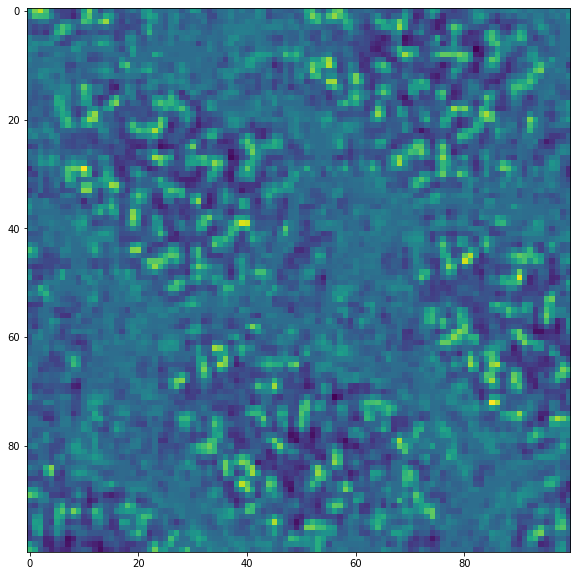

In [246]:
fig=plt.figure(figsize=(40, 10))

plt.imshow(x_np_slice_2d)

In [240]:
xmap_np = np.array(xmap)

In [241]:
xmap_np_slice_2d = xmap_np[:, 25, :]
print(xmap_np.shape)

(99, 107, 215)


In [242]:
# xmap_np_slice_2d[xmap_np_slice_2d < 0.15] =0

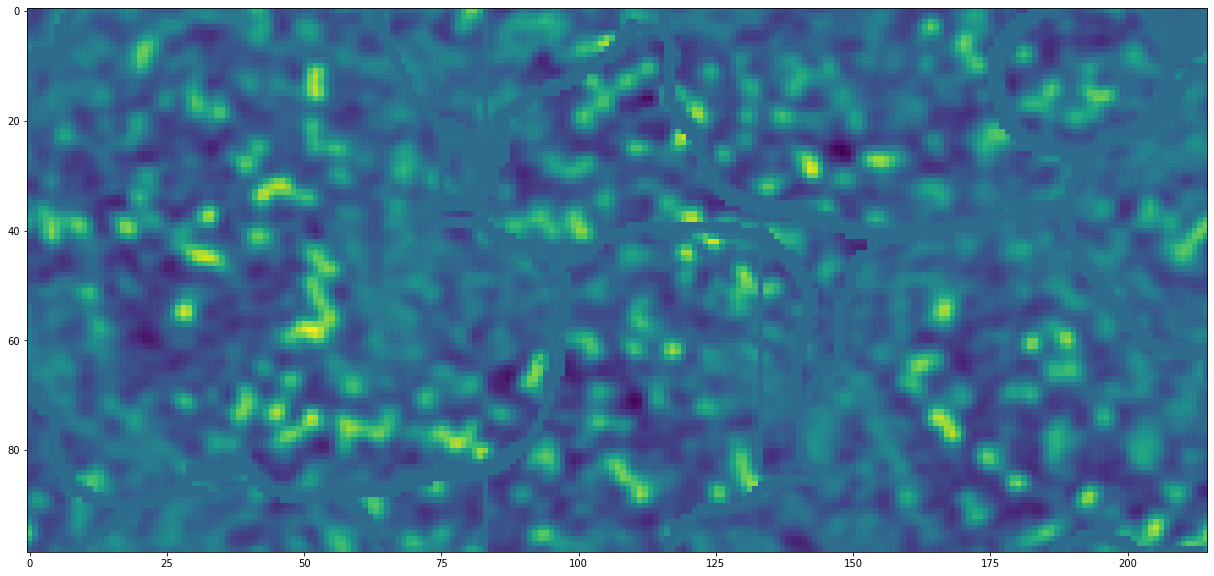

In [243]:
fig=plt.figure(figsize=(40, 10))

plt.imshow(xmap_np_slice_2d)

In [244]:
# x_, y_, z_ = (x_np_slice > 0.5).nonzero()

In [226]:
# x_

In [227]:
# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(x_, y_, z_, zdir='z', c= 'red')
# for angle in range(0, 360):
#     ax.view_init(30, angle)
#     plt.draw()
#     plt.pause(.1)

In [228]:
# shuffled_dset = dataset.shuffle(100)

# Define Model

# Define loss function

# Define optimizer

# Define Metrics

# Compile Model

# Fit Model

# Inspect Model